|| Classification Modelling of IRIS Dataset || 
By:- Alind Singh (R00224088)

First, we'll load the IRIS dataset from the sklearn datasets in Python. We will then train different classification models to predict the species of an Iris flower based on its measurements.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#Load the dataset
iris_data = load_iris()

#Create a pandas dataframe for the data
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target

Now, let's explore the dataset.

In [2]:
#Check the first few rows of the Dataframe
print(df.head(),'\n')

#Check the dimensions of the Dataframe
print("Dimensions: ",df.shape,'\n')

#Check the datatypes of the columns
print(df.dtypes,'\n')

#Check the unique values in the target column
print('Unique Values of the Target Column: ',df['target'].unique())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   

Dimensions:  (150, 5) 

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object 

Unique Values of the Target Column:  [0 1 2]


Now, let's check if our data has missing values. We'll need to handle the missing data if there is any before starting with the analysis.

In [3]:
#Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


We can see that our dataset doesn't have any missing values. So we are good on that part.
Next, we will perform some exploratory data analysis on the dataset in order to get a better understanding of the dataset and it's variables, which will in return help us later with effective modelling.
First, we will perform descriptive statistics.

In [4]:
#Generate descriptive statistics of the numerical columns
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
#Calculate the values of the correlation coefficients
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


We can see from the correlation matrix that among the features; petal length and petal width have the highest value of correlation coefficient. A value of 0.962865, indicates a very strong and positive relationship between the two variables. 
Whereas, petal width and petal length both seem to have a strong positive relationship with the target variable, having 0.956547 and 0.949035 as the values of the correlation coefficient.

To confirm our interpretation we can use scatter plots and visualize the relationship between the variables.

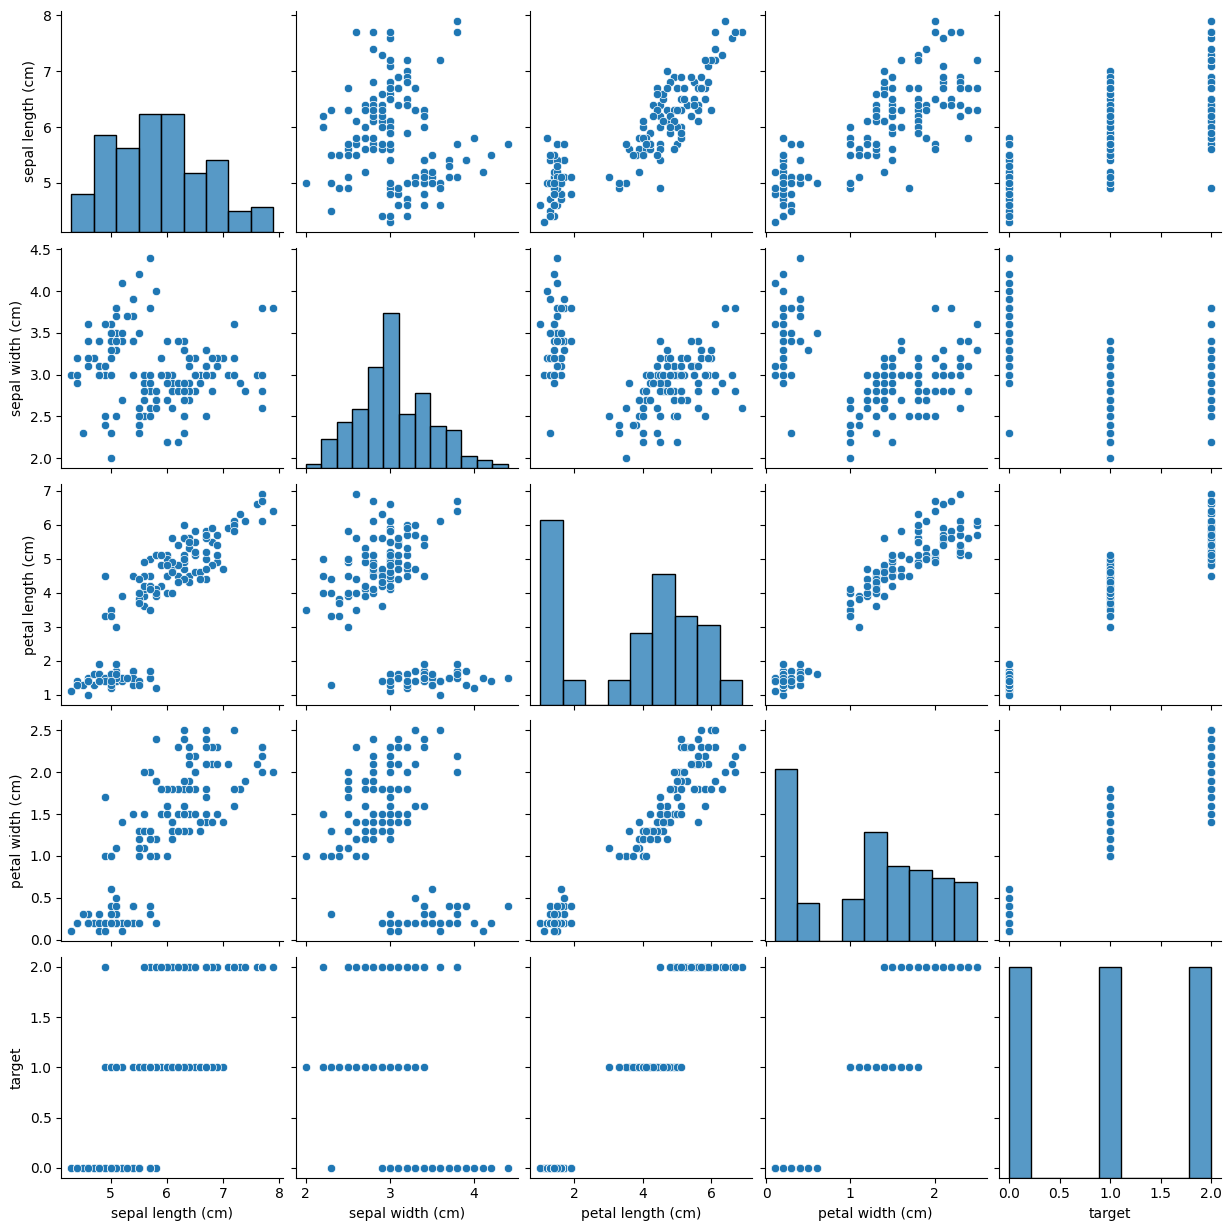

In [6]:
#Pairplot to visualize relationships between features
sb.pairplot(df)
plt.show()

Now, let's try to visualize the distribution of the scatter plots and the relationship between the features, in context to the target variable.
We will use the pairplot again, but set the hue value to "target" column's values.

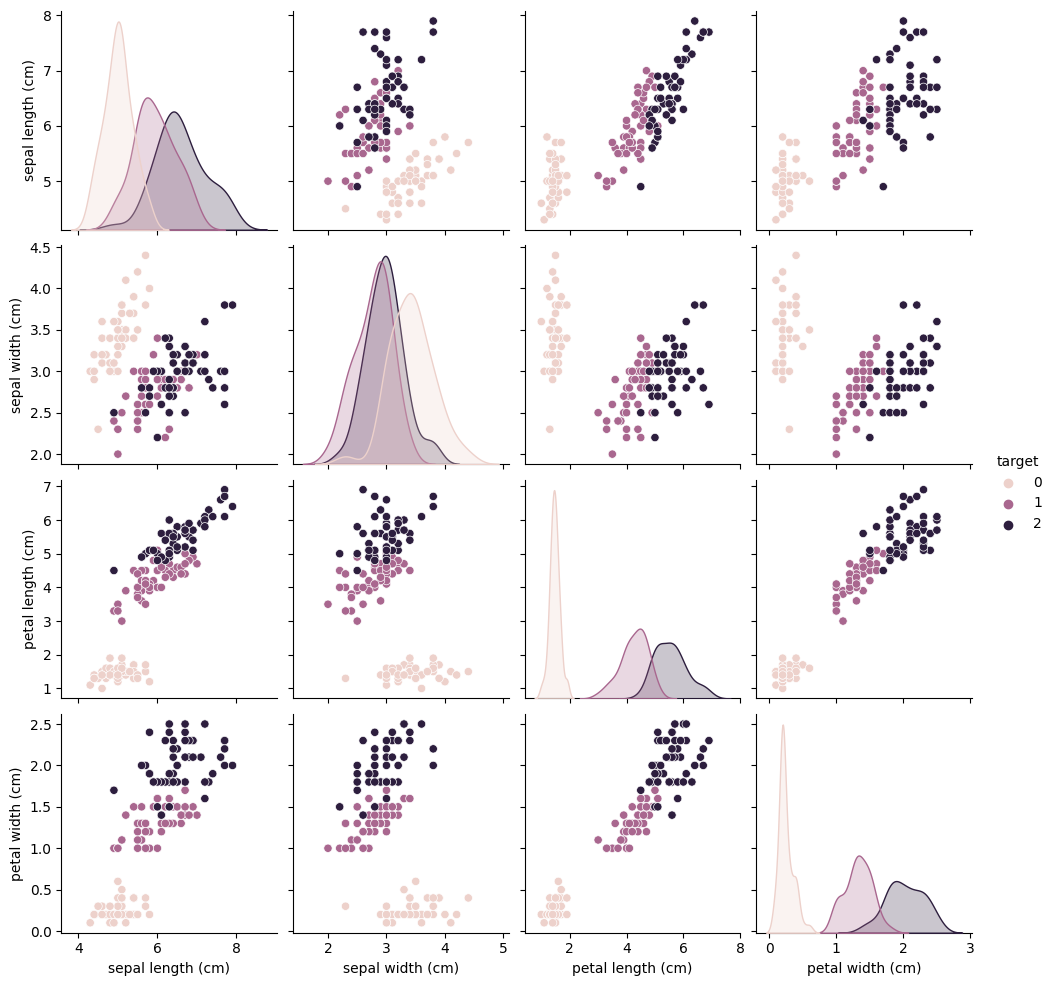

In [7]:
#Pairplot to visualize relationships between features in context to the target variable
sb.pairplot(df, hue='target')
plt.show()

We can use boxplots to visualize the distribution of each feature by target class.

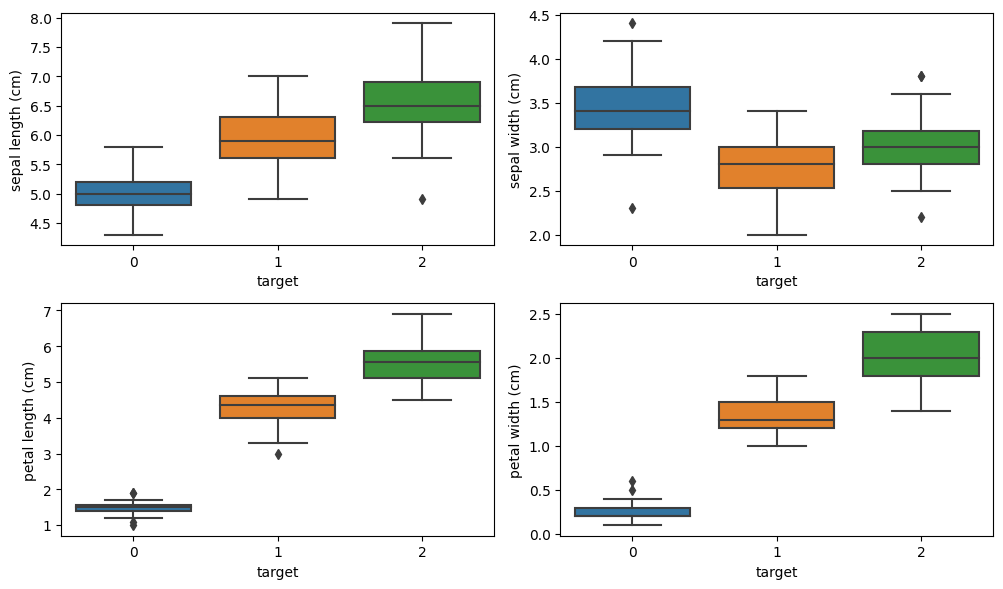

In [8]:
#Create box plots to visualize the distribution of each feature by target class
plt.figure(figsize=(10,6))
for i,feature in enumerate(iris_data.feature_names):
    plt.subplot(2,2,i+1)
    sb.boxplot(x='target', y=feature, data=df)
plt.tight_layout()
plt.show()    

Finally, we will implement feature scaling by the use of Standardization method. This will transform the features to a common scale. It will help us in improving the model performance and mitigate the impact of outliers that we interpreted from the boxplots.

In [9]:
from sklearn.preprocessing import StandardScaler

#Separate features and target
X = df.drop('target', axis=1)
y = df['target']

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Spliting the dataset into training and testing subsets is essential to evaluate the performance of the trained models on unseen data. So now, we will spilt our data into training and test sets in a 70:30 ratio respectively. We will use train_test_split() function of the sklearn library.

In [10]:
from sklearn.model_selection import train_test_split

#Split the dataset into training and testting subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=40)

print('Feature length for training set: ',len(X_train))
print('Feature length for test set: ',len(X_test))
print('Target length for training set: ',len(y_train))
print('Target length for test set: ',len(y_test))

Feature length for training set:  105
Feature length for test set:  45
Target length for training set:  105
Target length for test set:  45


Now, that we have split the dataset into training and testing subsets. Let's proceed with building, training and then evaluating a range of machine learning classification models on the Iris dataset. 
The algorithms that we will cover are:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Machine (SVM)
5. K-Nearest Neighbours (KNN)
6. Gradient Boosting

To evaluate the models, we'll use common performance metrics such as accuracy, precision, recall and F1-score. Additionally, we'll use cross-validation with 10 folds to obtain more reliable results.

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': XGBClassifier()
}

#Iterate over the models and evaluate their performance
for name, model in models.items():
    #Perform cross-validation
    scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')

    #Fit the model
    model.fit(X_train, y_train)

    #Make predictions
    y_pred = model.predict(X_test)

    #Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    #Print the results
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {np.mean(scores):.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print("---------------------------------------------------\n")

Model: Logistic Regression
Cross-Validation Accuracy: 0.960
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000
---------------------------------------------------

Model: Decision Tree
Cross-Validation Accuracy: 0.953
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000
---------------------------------------------------

Model: Random Forest
Cross-Validation Accuracy: 0.967
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000
---------------------------------------------------

Model: SVM
Cross-Validation Accuracy: 0.967
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000
---------------------------------------------------

Model: KNN
Cross-Validation Accuracy: 0.953
Accuracy: 0.978
Precision: 0.979
Recall: 0.978
F1-Score: 0.978
---------------------------------------------------

Model: Gradient Boosting
Cross-Validation Accuracy: 0.960
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000
-------------------------------------------

Looking at the performance metrics, it looks each machine learning algorithm performed pretty well on the data, in predicting the species of the Iris flower. But looking at the cross-validation accuracy, support vector machine (SVM) model, gradient boosting (XGB) model and logistic regression model stand out.
So we will put these three models through hyper-parameter optimization. 

In [12]:
from sklearn.model_selection import GridSearchCV

#Define the hyperparamter grid for each model
param_grid = {
    'Logistic Regression': {'C': [0.1,1,10]},
    'SVM': {'C': [0.1,1,10], 'kernel': ['linear','rbf']},
    'Gradient Boosting': {'n_estimators': [100,200,300], 'learning_rate': [0.1,0.01,0.001]}
}

selected_models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Gradient Boosting': XGBClassifier()
}

best_models = {}

#Iterate over the models and perform hyperparameter optimization
for name,model in selected_models.items():
    #Create a GridSearchCV object with the model and corresponding parameter grid
    grid_search = GridSearchCV(model, param_grid[name], cv=10, scoring='accuracy')

    #Fit the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train)

    #Get the best model and its parameters
    best_model = grid_search.best_estimator_

    #Store the best model
    best_models[name] = best_model

    #Print the best estimators and cross-validated score
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Cross-Validated Accuracy for {name}: {grid_search.best_score_:.3f}")
    print("----------------------------------------------------------------\n")

Best parameters for Logistic Regression: {'C': 10}
Cross-Validated Accuracy for Logistic Regression: 0.954
----------------------------------------------------------------

Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Cross-Validated Accuracy for SVM: 0.964
----------------------------------------------------------------

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 100}
Cross-Validated Accuracy for Gradient Boosting: 0.942
----------------------------------------------------------------



One interesting topic to research and incorporate into the models is "feature engineering" using domain knowledge. It involves creating new features or transforming existing ones to improve the predictive power of the models. In context to Iris dataset, we can consider incorporating the petal area as an additional feature and then evaluating its impact on the classification models. The petal area can be calculated by multiplying petal length and petal width.

In [13]:
#Create a new feature - petal area
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']

#Update the feature matrix and target
X_petal_area = df.drop(['target'], axis=1)
y = df['target']

#Standardize the updated feature matrix
X_petal_area_scaled = scaler.fit_transform(X_petal_area)

#Split the dataset into training and testing subsets again
X_train_petal_area, X_test_petal_area, y_train_petal_area, y_test_petal_area = train_test_split(
    X_petal_area_scaled, y, test_size=0.3, random_state=40
)

#Iterate over the models and evaluate the performance of each with the updated dataset
for name,model in models.items():
    #Perform cross-validation
    scores_petal_area = cross_val_score(model, X_petal_area_scaled, y, cv=10, scoring='accuracy')

    #Fit the model on the updated training data
    model.fit(X_train_petal_area, y_train_petal_area)

    #Make predictions on the updated test data
    y_pred_petal_area = model.predict(X_test_petal_area)

    #Calculate evaluation metrics
    accuracy_petal_area = accuracy_score(y_test_petal_area,y_pred_petal_area)
    precision_petal_area = precision_score(y_test_petal_area,y_pred_petal_area,average='weighted')
    recall_petal_area = recall_score(y_test_petal_area,y_pred_petal_area,average='weighted')
    f1_petal_area = f1_score(y_test_petal_area,y_pred_petal_area,average='weighted')

    #Print the results
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {np.mean(scores_petal_area):.3f}")
    print(f"Accuracy (with petal area): {accuracy_petal_area:.3f}")
    print(f"Precision (with petal area): {precision_petal_area:.3f}")
    print(f"Recall (with petal area): {recall_petal_area:.3f}")
    print(f"F1-Score (with petal area): {f1_petal_area:.3f}")
    print("--------------------------------------------------------\n") 

Model: Logistic Regression
Cross-Validation Accuracy: 0.967
Accuracy (with petal area): 1.000
Precision (with petal area): 1.000
Recall (with petal area): 1.000
F1-Score (with petal area): 1.000
--------------------------------------------------------

Model: Decision Tree
Cross-Validation Accuracy: 0.960
Accuracy (with petal area): 1.000
Precision (with petal area): 1.000
Recall (with petal area): 1.000
F1-Score (with petal area): 1.000
--------------------------------------------------------

Model: Random Forest
Cross-Validation Accuracy: 0.960
Accuracy (with petal area): 1.000
Precision (with petal area): 1.000
Recall (with petal area): 1.000
F1-Score (with petal area): 1.000
--------------------------------------------------------

Model: SVM
Cross-Validation Accuracy: 0.960
Accuracy (with petal area): 1.000
Precision (with petal area): 1.000
Recall (with petal area): 1.000
F1-Score (with petal area): 1.000
--------------------------------------------------------

Model: KNN
Cross